In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings('ignore')

In [16]:
# covide-19 글로벌 kaggle 데이터
kag = pd.read_csv('../data/corona-virus-report_0430/covid_19_clean_complete.csv')
kag['Date'] = pd.to_datetime(kag['Date'])
kag_dated_1 = kag.groupby(['Date'], as_index=False)['Confirmed','Deaths', 'Recovered'].sum()

# 각 컬럼별 일별 데이터 산출

cols = list(kag_dated_1.columns[1:])
for col in cols:
    col_name = "Day"+str(col)
    kag_dated_1['{}'.format(col_name)] = kag_dated_1['{}'.format(col)].diff()
    kag_dated_1['{}'.format(col_name)].iloc[0] = 0

In [19]:
# 불필요 변수 삭제
kag.drop(['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [21]:
glob = kag.copy()

In [24]:
pivoted_glob = glob.pivot_table(index = 'Date', columns = 'Country/Region', values = 'Confirmed', aggfunc='sum')

In [26]:
pivoted_glob

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,West Bank and Gaza,Western Sahara,Yemen,Zambia,Zimbabwe
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,4,0,...,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-26,1531,726,3382,738,26,24,3892,1746,6714,15225,...,154037,606,1869,325,270,342,6,1,88,31
2020-04-27,1703,736,3517,743,27,24,4003,1808,6721,15274,...,158348,620,1904,329,270,342,6,1,88,32
2020-04-28,1828,750,3649,743,27,24,4127,1867,6744,15357,...,162350,625,1939,329,270,343,6,1,95,32


In [25]:
pivoted_glob.to_csv('glob.csv')

# 국가별 로밍 데이터

In [31]:
roam = pd.read_csv('../data/corona_contest_data_0429/2. Roaming_data.csv')

In [32]:
roam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5480 entries, 0 to 5479
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   return     5480 non-null   int64 
 1   iso        5390 non-null   object
 2   arrival    5480 non-null   int64 
 3   departure  5480 non-null   int64 
 4   count      5480 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 214.2+ KB


In [33]:
roam['return'] = pd.to_datetime(roam['return'], format='%Y%m%d')
roam['arrival'] = pd.to_datetime(roam['arrival'], format='%Y%m%d')
roam['departure'] = pd.to_datetime(roam['departure'], format='%Y%m%d')

In [34]:
roam.head()

,return,iso,arrival,departure,count
0,2020-04-28,at,2020-04-28,2020-04-28,3
1,2020-04-28,be,2020-04-28,2020-04-28,3
2,2020-04-28,ca,2020-04-21,2020-04-21,3
3,2020-04-28,ca,2020-04-26,2020-04-26,3
4,2020-04-28,ca,2020-04-27,2020-04-27,3


In [38]:
pivoted_roam = roam.pivot_table(index = 'return', columns = 'iso', values = 'count', aggfunc='sum')

In [42]:
pivoted_roam

iso,ae,af,al,ao,ar,at,au,az,bd,be,...,tz,ua,ug,us,uy,uz,vn,ye,za,zm
return,,,,,,,,,,,,,,,,,,,,,
2020-04-01,NaN,3.0,NaN,NaN,NaN,12.0,6.0,NaN,NaN,NaN,...,6.0,NaN,NaN,161.0,6.0,3.0,128.0,NaN,NaN,3.0
2020-04-02,NaN,3.0,NaN,NaN,NaN,15.0,6.0,3.0,NaN,15.0,...,NaN,NaN,NaN,167.0,3.0,NaN,81.0,NaN,NaN,NaN
2020-04-03,NaN,3.0,NaN,NaN,NaN,3.0,36.0,NaN,3.0,3.0,...,NaN,NaN,NaN,161.0,3.0,NaN,46.0,NaN,NaN,NaN
2020-04-04,3.0,NaN,NaN,NaN,NaN,12.0,45.0,NaN,NaN,3.0,...,NaN,NaN,3.0,156.0,3.0,NaN,88.0,NaN,NaN,NaN
2020-04-05,9.0,NaN,NaN,NaN,9.0,8.0,32.0,NaN,NaN,6.0,...,NaN,NaN,NaN,155.0,NaN,NaN,51.0,NaN,3.0,NaN
2020-04-06,NaN,NaN,NaN,NaN,NaN,9.0,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,102.0,3.0,NaN,57.0,NaN,3.0,NaN
2020-04-07,3.0,NaN,NaN,NaN,NaN,3.0,3.0,NaN,NaN,6.0,...,NaN,NaN,NaN,122.0,3.0,NaN,103.0,NaN,NaN,NaN
2020-04-08,33.0,NaN,NaN,NaN,NaN,9.0,3.0,NaN,NaN,3.0,...,NaN,NaN,NaN,150.0,3.0,NaN,73.0,3.0,NaN,NaN
2020-04-09,3.0,3.0,3.0,NaN,NaN,9.0,27.0,NaN,NaN,6.0,...,NaN,NaN,NaN,151.0,6.0,NaN,87.0,NaN,NaN,NaN


iso
ae    11
af    20
al    27
ao    27
ar    27
      ..
uz    23
vn     0
ye    27
za    25
zm    27
Length: 119, dtype: int64


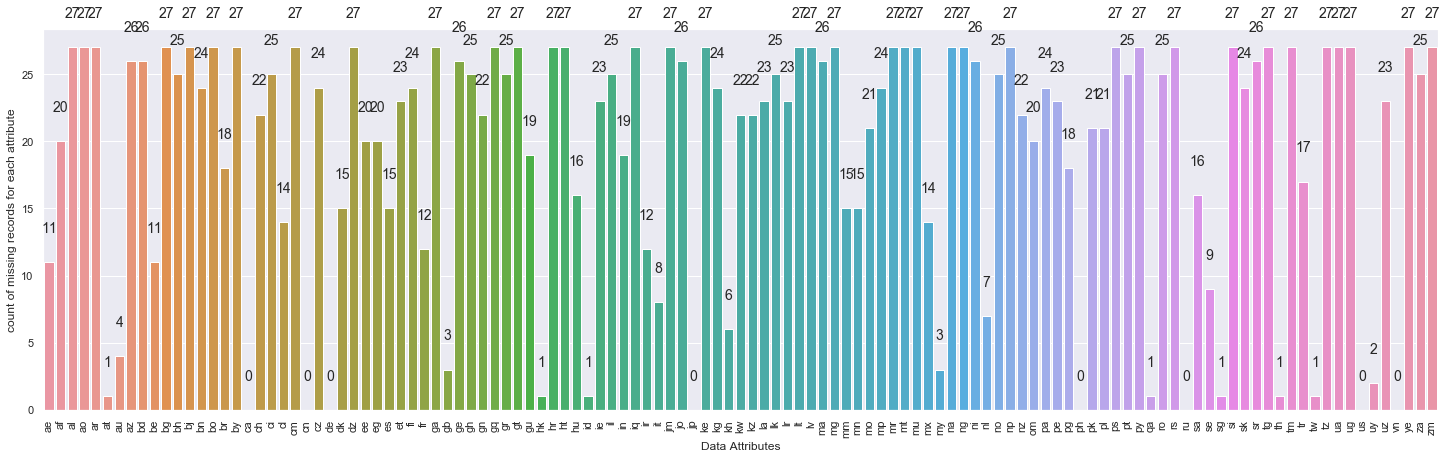

In [41]:

# 전체 결측치 확인
x = pivoted_roam.columns
y = pivoted_roam.isnull().sum()
print(y)
plt.figure(figsize=(25,7))
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
           height + 2,
           int(height),
           fontsize=14,
           ha='center',
           va='bottom')
sns.set(font_scale = 1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [45]:
pivoted_roam.fillna(0, inplace=True)

In [49]:
pivoted_roam=pivoted_roam.astype(int)

In [53]:
pivoted_roam.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2020-04-01 to 2020-04-28
Columns: 119 entries, ae to zm
dtypes: int32(119)
memory usage: 13.2 KB


In [54]:
pivoted_roam.to_csv('country_grouped_roam0428.csv')